## Generando imágenes con autocodificadores variacionales (variational autoencoders)

* Una de las aplicaciones más populares de la IA creativa es la **generación de imágenes**: **aprender espacios visuales latentes** y **muestrearlos para crear imágenes completamente nuevas interpoladas a partir de imágenes reales** 
* Las dos técnicas principales en este dominio: **codificadores automáticos variacionales (VAEs**) y **redes antagónicas generativas (GAN)**. 
* Ojo que **no son técnicas específicas de las imágenes**: podría desarrollar espacios latentes de **sonido**, **música** o incluso **texto**, utilizando GAN y VAE, aunque los resultados más interesantes se han obtenido con imágenes.

### Muestreos de espacios latentes de imágenes

* La idea clave de la generación de imágenes es desarrollar un **espacio latente** de representaciones de baja dimensión (**espacio vectorial**), donde **cualquier punto** se puede **asignar a una imagen "válida"**: una imagen que parece a una real. 
* El módulo capaz de realizar este mapeo, tomando como **entrada** un **punto latente** y **emitiendo una imagen** (una cuadrícula de píxeles), se denomina **generador** (**en el caso de GAN**) o **decodificador** (**en el caso de VAE**).
* Una vez que se ha aprendido un espacio latente de este tipo, podemos **tomar muestras de puntos** y, al **mapearlos nuevamente en el espacio de la imagen**, **generar imágenes que nunca antes se habían visto**. Estas nuevas imágenes son los intermedias de las imágenes de entrenamiento.

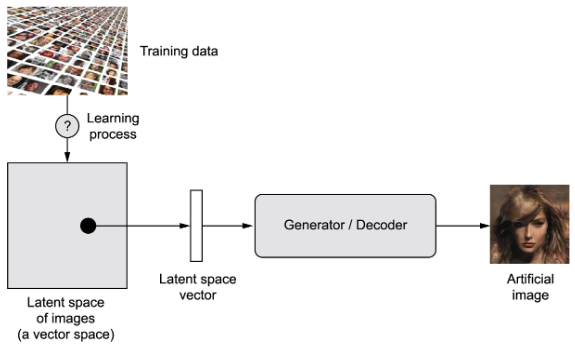

* **GANs** y **VAE** son **dos estrategia**s diferentes para **s** de imágenes
  * **VAE** excelentes para aprender espacios latentes que están **bien estructurados**, donde direcciones específicas **codifican un eje significativo de variación en los datos**
  * **GAN** generan **imágenes** que **potencialmente** pueden ser **muy realistas**, pero el espacio latente del que provienen **puede no tener tanta estructura ni continuidad**.

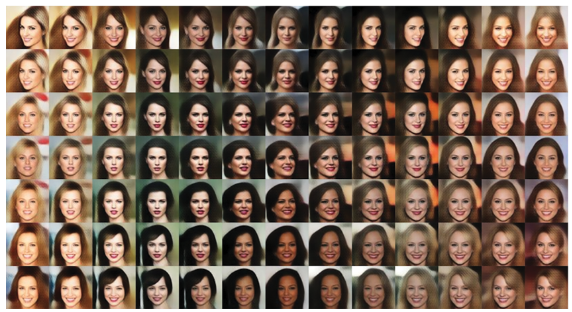

### Vectores conceptuales para la edición de imágenes

* Imaginad un **vector conceptual** como un **word embedding de imágenes** (en un espacio latente de imágenes de caras, por ejemplo, puede haber un **vector de sonrisa**, de modo que si el **punto latente ``z``** es la **representación** incrustada de una **determinada cara**, entonces el **punto latente ``z + s``** es la **representación incrustada de la misma cara, sonriendo**)
* Una vez que haya identificado dicho vector, será posible **editar imágenes** **proyectándolas en el espacio latente**, moviendo su representación de manera significativa y luego **decodificándolas de nuevo en el espacio de la imagen**. 
* Existen **vectores conceptuales** para prácticamente cualquier dimensión independiente de variación en el espacio de la imagen; en el caso de las caras, puede descubrir vectores para **agregar gafas de sol** a una cara, **quitarse las gafas**, **convertir una cara masculina en una cara femenina**, etc. 

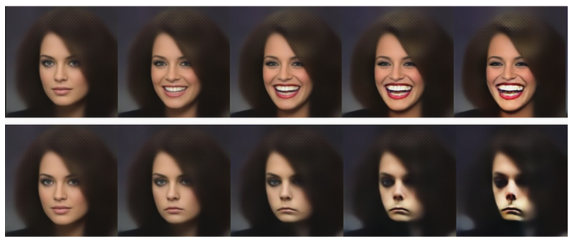

### Codificadores Automáticos Variacionales (Variational autoencoders)

* Los **autocodificadores variacionales**, descubiertos simultáneamente por Kingma y Welling en diciembre de 2013 [(Diederik P. Kingma and Max Welling, “Auto-Encoding Variational Bayes,” arXiv (20+13)](https://arxiv.org/abs/1312.6114) y Rezende, Mohamed y Wierstra en enero de 2014 [Danilo Jimenez Rezende, Shakir Mohamed, and Daan Wierstra, “Stochastic Backpropagation and Approximate Inference in Deep Generative Models,” arXiv (2014)](https://arxiv.org/abs/1401.4082), son un **tipo de modelo generativo especialmente apropiado para la tarea de edición de imágenes mediante vectores conceptuales**. 
* Combina ideas del deep learning con la inferencia bayesiana.
* Un autoencoder de imágenes clásico **toma una imagen**, la **asigna a un espacio vectorial latente a través de un módulo codificador** y luego **la decodifica a una salida con las mismas dimensiones que la imagen original**, a través de un **módulo decodificador**
* Luego **se entrena utilizando como datos objetivo** las **mismas imágenes que las imágenes de entrada**, lo que significa que **el autoencoder aprende a reconstruir las entradas originales**. 
* Al **imponer varias restricciones en el código** (la salida del codificador), podemos hacer que el **autoencoder aprenda representaciones latentes más o menos interesantes de los datos**. Por lo general, el **codificador** actúa como una forma de **comprimir los datos de entrada** en menos bits de información.

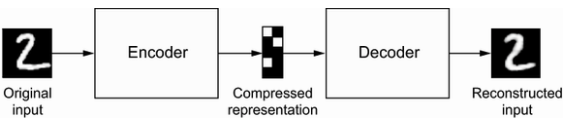

* Los autoencoders clásicos no conducen a espacios latentes particularmente útiles o bien estructurados ni son buenos compresores, por eso no se usan.
* Los **VAE**, sin embargo, **aumentan los autoencoders con un poco de magia estadística** que **los obliga a aprender espacios latentes continuos y altamente estructurados**. 
* Un **VAE**, en lugar de comprimir su imagen, **la convierte en los parámetros de una distribución estadística**: una **media** y una **varianza**. 
* Asumimos que la imagen de entrada ha sido generada por un proceso estadístico y que la aleatoriedad de este proceso debe tenerse en cuenta durante la codificación y decodificación. 
* Luego, el **VAE usa** los parámetros de **media** y **varianza** para **muestrear aleatoriamente un elemento de la distribución y decodifica ese elemento de regreso a la entrada original**
* La **estocasticidad** de este proceso **mejora la robustez** y obliga al espacio latente a codificar representaciones significativas en todas partes: cada punto muestreado en el espacio latente se decodifica en una salida válida.

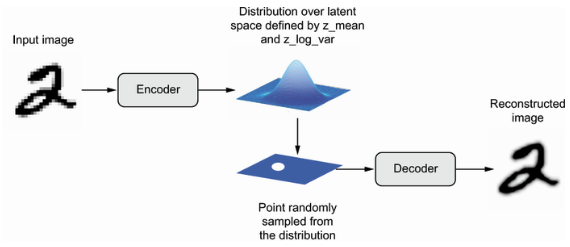

En términos técnicos, así es como funciona un VAE: 
1. Un módulo **encoder** (codificador) **convierte la muestra de entrada, ``input_img``**, **en dos parámetros en un espacio latente de representaciones**, **``z_mean`` y ``z_log_variance``**. 
2. **Muestrea aleatoriamente un punto ``z`` de la distribución normal latente** que **se supone genera la imagen de entrada**, a través de **``z = z_mean exp(z_log_variance) * epsilon``**, donde **``epsilon``** es un **tensor aleatorio de valores pequeños**. 
3. Un módulo **decoder** (decodificador) **mapea este punto en el espacio latente de vuelta a la imagen de entrada original**.

Debido a que ``épsilon`` es aleatorio, el **proceso garantiza que cada punto que está cerca de la ubicación latente donde codificó ``input_img``` (``z-mean``) se puede decodificar en algo similar a ``input_img``**, lo que **obliga al espacio latente a tener un significado continuo**. **Cualquiera de dos puntos cercanos en el espacio latente se decodificará en imágenes muy similares**. La **continuidad**, combinada con la **baja dimensionalidad del espacio latente**, obliga a todas las direcciones del espacio latente a **codificar un eje significativo de variación de los datos**, lo que hace que el **espacio latente esté muy estructurado** y, por lo tanto, sea muy adecuado para la **manipulación a través de vectores conceptuales**. 

Los parámetros de un VAE se entrenan a través de dos funciones de pérdida: 
* Una **pérdida de reconstrucción** que **obliga a las muestras decodificadas a coincidir con las entradas iniciales**
* Una **pérdida de regularización** que ayuda a **aprender distribuciones latentes bien redondeadas** y **reduce el sobreajuste de los datos de entrenamiento**. 

Esquemáticamente, el proceso se ve así:

In [ ]:
# Codifica la entrada en parámetros de media y varianza
z_mean, z_log_variance = encoder(input_img)
# Dibuja un punto latente utilizando un pequeño épsilon aleatorio
z = z_mean + exp(z_log_variance) * epsilon
# Decodifica z de nuevo a una imagen
reconstructed_img = decoder(z)
# Crea una instancia del modelo autoencoder, que 
# asigna una imagen de entrada a su reconstrucción
model = Model(input_img, reconstructed_img)

De cara a su implementación en Keras, para la **pérdida de regularización**, normalmente usamos una expresión (la **divergencia Kullback-Leibler**) destinada a **empujar la distribución de la salida del codificador hacia una distribución normal bien redondeada centrada alrededor de 0**. Esto **proporciona al codificador una suposición sensata sobre la estructura de la espacio latente que está modelando**. 

### Implementando un VAE con Keras

Vamos a implementar un **VAE que pueda generar dígitos MNIST**. Va a tener tres partes: 
* Una **red encoder** que **convierte una imagen real** en una **media y una varianza en el espacio latente** 
* Una **capa de muestreo** que **toma dicha media y varianza**, y las usa para **muestrear un punto aleatorio del espacio latente** 
* Una **red decoder** que **convierte los puntos del espacio latente en imágenes** 

La red encoder mapeará imágenes a los parámetros de una distribución de probabilidad sobre el espacio latente. Es un convnet simple que asigna la imagen de entrada ``x`` a dos vectores, ``z_mean`` y ``z_log_var``. Un detalle importante es que usamos ``strides``(zancadas) para reducir la resolución de los mapas de características en lugar de un ``max pooling``.

**NOTA**: un **espacio latente** se refiere a un **espacio abstracto de características** o variables que se utilizan para **representar datos de entrada** de manera más **compacta** y **significativa**. En otras palabras, es **una forma de comprimir y resumir la información contenida en los datos de entrada** -> Este espacio latente **se aprende a través de un modelo de deep learning** que **se entrena para encontrar patrones** y características subyacentes en los datos de entrada.(ejemplo, si estamos trabajando con imágenes, el modelo podría aprender a representar las imágenes en términos de características como la textura, el color, la forma, la orientación, etc. Estas características se convierten en las dimensiones del espacio latente)

Una vez que se ha aprendido el espacio latente, se puede utilizar para realizar diversas tareas: 
  * **Generación de nuevas muestras de datos**
  * **Reconstrucción de las entradas originales**
  * **Clasificación de datos**
  * etc. 

Por ejemplo, si estamos trabajando con un **modelo generativo**, se podría **generar nuevas imágenes al muestrear puntos aleatorios en el espacio latente** y **decodificarlos en el espacio de entrada**

**Red encoder VAE**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

# Dimensionalidad del espacio latente: un plano 2D
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
# La imagen de entrada termina siendo codificada 
# en estos dos parámetros: z_mean y z_log_var
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

In [2]:
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 14, 14, 32)   320         ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 7, 7, 64)     18496       ['conv2d[0][0]']                 
                                                                                                  
 flatten (Flatten)              (None, 3136)         0           ['conv2d_1[0][0]']               
                                                                                            

El siguiente código es para **generar un punto espacial latente ``z``** usando ``z_mean`` y ``z_log_var``, los parámetros de la distribución estadística que se supone que produjeron ``input_img``:

**Capa de muestreo-espacio-latente (Latent-space-sampling)**

In [3]:
import tensorflow as tf

class Sampler(layers.Layer):
    def call(self, z_mean, z_log_var):
        batch_size = tf.shape(z_mean)[0]
        z_size = tf.shape(z_mean)[1]
        # Dibuja un lote de vectores normales aleatorios.
        epsilon = tf.random.normal(shape=(batch_size, z_size))
        # Aplicar la fórmula de muestreo VAE
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

El siguiente código es la **implementación del decodificador**. Redimensionamos el vector ``z`` a las dimensiones de una imagen y luego usamos algunas capas de convolución para obtener una salida de imagen final que tiene las mismas dimensiones que la ``input_img`` original.

**Red de decodificadores VAE, asignando puntos de espacio latente a imágenes**

In [4]:
# Entrada a través de la cual alimentaremos con z
latent_inputs = keras.Input(shape=(latent_dim,))
# Producimos la misma cantidad de coeficientes que 
# teníamos al nivel de la capa Flatten en el codificador.
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
# Revertimos la capa Flatten del codificador.
x = layers.Reshape((7, 7, 64))(x)
# Revertimos las capas Conv2D del codificador.
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
# La salida termina con la forma (28, 28, 1)
decoder_outputs = layers.Conv2D(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")

In [5]:
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 64)       36928     
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 32)       18464     
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 1)         289 

Creamos el **propio modelo VAE**. **Este es nuestro primer ejemplo de un modelo que no realiza aprendizaje supervisado** (un autoencoder es un ejemplo de **aprendizaje autosupervisado**, porque **utiliza sus entradas como objetivos**). Cada vez que se sale del aprendizaje supervisado clásico, es **común crear una subclase de la clase ``Model`` e implementar un ``train_ step()`` personalizado para especificar la nueva lógica de entrenamiento**.

**Modelo VAE con `train_step()` personalizado**

In [6]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.sampler = Sampler()
        # Usamos estas métricas para realizar un seguimiento 
        # de los promedios de pérdida en cada época.
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss")
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    # Listamos las métricas en la propiedad metrics para permitir 
    # que el modelo las restablezca después de cada época (o entre 
    # varias llamadas a fit()/evaluate())
    def metrics(self):
        return [self.total_loss_tracker,
                self.reconstruction_loss_tracker,
                self.kl_loss_tracker]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var = self.encoder(data)
            z = self.sampler(z_mean, z_log_var)
            reconstruction = decoder(z)
            # Sumamos la pérdida de reconstrucción sobre las 
            # dimensiones espaciales (ejes 1 y 2) y tomamos 
            # su media sobre la dimensión del lote.
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction),
                    axis=(1, 2)
                )
            )
            # Agreguamos el término de regularización 
            # (divergencia de Kullback-Leibler).
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            total_loss = reconstruction_loss + tf.reduce_mean(kl_loss)
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "total_loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

Ahora **instanciamos y entrenar el modelo en dígitos MNIST**. Debido a que la **pérdida se soluciona en la capa personalizada**, **no especificamos una pérdida externa** en el momento de la compilación (``loss=None``), lo que a su vez significa que **no pasaremos los datos target durante el entrenamiento** (como podemos ver, solo pasamos ``x_train`` al modelo en ``fit()``).

**Entrenando la VAE**

In [7]:
import numpy as np

(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
# Entrenamos en todos los dígitos MNIST, por lo que 
# concatenamos las muestras de entrenamiento y prueba.
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
# Notemos que no pasamos un argumento de pérdida a compile(), 
# ya que la pérdida ya es parte de train_step()
vae.compile(optimizer=keras.optimizers.Adam(), run_eagerly=True)
# Notemos que no pasamos objetivos (targets) en fit(), 
# ya que train_step() no espera ninguno
vae.fit(mnist_digits, epochs=30, batch_size=128)

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30


547/547 [==============================] - 42s 56ms/step - total_loss: 209.1751 - reconstruction_loss: 206.7141 - kl_loss: 2.4611
Epoch 2/30
547/547 [==============================] - 27s 50ms/step - total_loss: 179.8656 - reconstruction_loss: 176.7285 - kl_loss: 3.1371
Epoch 3/30
547/547 [==============================] - 28s 52ms/step - total_loss: 163.6353 - reconstruction_loss: 159.9605 - kl_loss: 3.6748
Epoch 4/30
547/547 [==============================] - 28s 51ms/step - total_loss: 158.5891 - reconstruction_loss: 154.8562 - kl_loss: 3.7329
Epoch 5/30
547/547 [==============================] - 28s 51ms/step - total_loss: 155.5725 - reconstruction_loss: 151.7958 - kl_loss: 3.7767
Epoch 6/30
547/547 [==============================] - 28s 50ms/step - total_loss: 153.7586 - reconstruction_loss: 149.9430 - kl_loss: 3.8157
Epoch 7/30
547/547 [==============================] - 27s 49ms/step - total_loss: 152.2852 - reconstruction_loss: 148.4571 - kl_loss: 3.8281
Epoch 8/30
547/547 [====

Una vez que se entrena el modelo, podemos **usar la red ``decoder``** para **convertir vectores espaciales latentes arbitrarios en imágenes**.

**Muestreo de una cuadrícula de imágenes del espacio latente 2D**

1/1 [==============================] - 0s 18ms/step


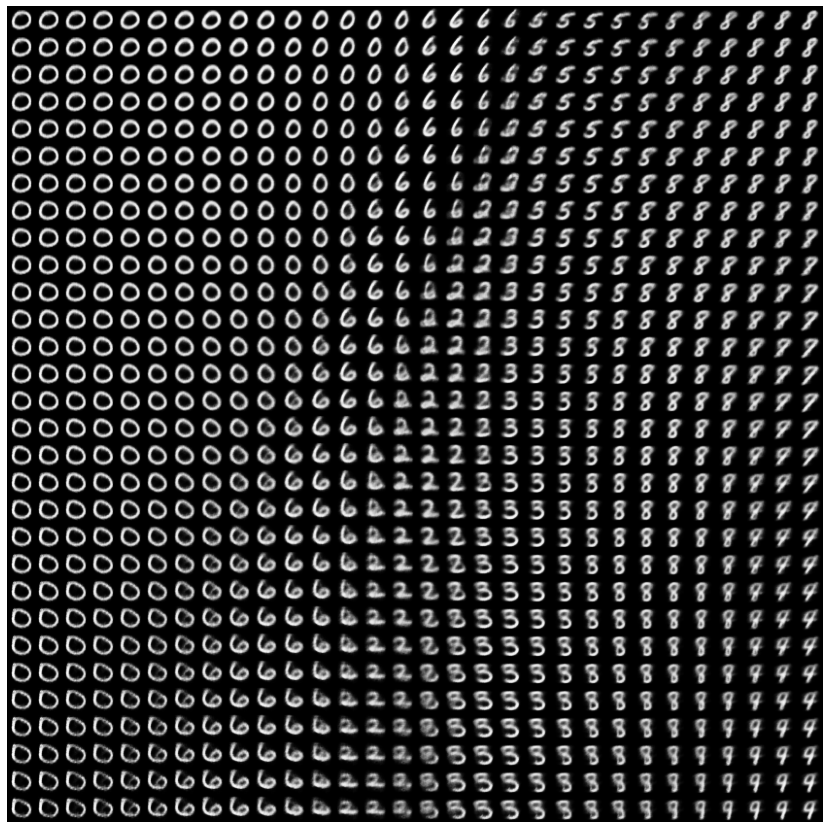

In [8]:
import matplotlib.pyplot as plt

# Mostraremos una cuadrícula de 
# 30 × 30 dígitos (900 dígitos en total)
n = 30
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

# Muestree de puntos linealmente en una cuadrícula 2D.
grid_x = np.linspace(-1, 1, n)
grid_y = np.linspace(-1, 1, n)[::-1]

for i, yi in enumerate(grid_y):
    for j, xi in enumerate(grid_x):
        # Para cada ubicación, muestreamos un 
        # dígito y lo agregamos a nuestra figura
        z_sample = np.array([[xi, yi]])
        x_decoded = vae.decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[
            i * digit_size : (i + 1) * digit_size,
            j * digit_size : (j + 1) * digit_size,
        ] = digit

plt.figure(figsize=(15, 15))
start_range = digit_size // 2
end_range = n * digit_size + start_range
pixel_range = np.arange(start_range, end_range, digit_size)
sample_range_x = np.round(grid_x, 1)
sample_range_y = np.round(grid_y, 1)
plt.xticks(pixel_range, sample_range_x)
plt.yticks(pixel_range, sample_range_y)
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.axis("off")
plt.imshow(figure, cmap="Greys_r")

**Cuadrícula de dígitos decodificados del espacio latente**

La cuadrícula de dígitos muestreados muestra una **distribución completamente continua de las diferentes clases de dígitos**, con **un dígito transformándose en otro** a medida que sigue un camino a través del espacio latente. Las direcciones específicas en este espacio tienen un significado: por ejemplo, hay direcciones para "quinquedad", "unidad", etc.

### Resumiendo

* La **generación de imágenes** con aprendizaje profundo se realiza mediante el **aprendizaje de espacios latentes** que **capturan información estadística sobre un conjunto de datos de imágenes**. Al **muestrear y decodificar puntos del espacio latente, puede generar imágenes nunca antes vistas**. Hay dos herramientas principales para hacer esto: **VAE** y **GAN**. 
* Los **VAE** dan como resultado **representaciones latentes continuas y altamente estructuradas**. Por esta razón, funcionan **bien para realizar todo tipo de edición de imágenes en el espacio latente**: intercambio de caras, convertir una cara con el ceño fruncido en una cara sonriente, etc. También funcionan muy **bien para hacer animaciones basadas en el espacio latente**, como mostrar una **imagen inicial que se transforma lentamente en diferentes imágenes de forma continua**. 
* Las **GAN permiten la generación de imágenes realistas de un solo cuadro**, pero es posible que **no induzcan espacios latentes con una estructura sólida y una alta continuidad**.